# Forecast the CocaCola prices data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


# Visualisation & EDA

In [4]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [5]:
df.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [7]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [8]:
df.value_counts()

Quarter  Sales      
Q1_86    1734.827000    1
Q3_95    4895.000000    1
Q3_87    2014.362999    1
Q3_88    2128.320000    1
Q3_89    2206.549995    1
Q3_90    2792.753998    1
Q3_91    3172.115997    1
Q3_92    3508.000000    1
Q3_93    3629.000000    1
Q3_94    4461.000000    1
Q4_86    2154.962997    1
Q1_87    1547.818996    1
Q4_87    1991.746998    1
Q4_88    2026.828999    1
Q4_89    2173.967995    1
Q4_90    2556.009995    1
Q4_91    2879.000999    1
Q4_92    3243.859993    1
Q4_93    3373.000000    1
Q4_94    4017.000000    1
Q3_86    2533.804993    1
Q2_96    5253.000000    1
Q2_95    4936.000000    1
Q2_94    4342.000000    1
Q1_88    1869.049999    1
Q1_89    1910.603996    1
Q1_90    2148.278000    1
Q1_91    2480.973999    1
Q1_92    2772.000000    1
Q1_93    3056.000000    1
Q1_94    3352.000000    1
Q1_95    3854.000000    1
Q1_96    4194.000000    1
Q2_86    2244.960999    1
Q2_87    2104.411995    1
Q2_88    2313.631996    1
Q2_89    2331.164993    1
Q2_90    2739.307

In [9]:
df.value_counts().sum()

42

In [10]:
df.isnull()

,Quarter,Sales
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [11]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [12]:
#No Null Values

In [13]:
df.shape

(42, 2)

In [14]:
df.duplicated().sum()

0

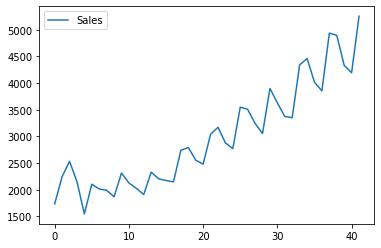

In [15]:
df.plot()
plt.show()

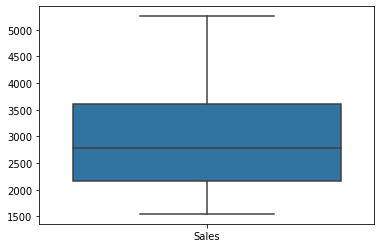

In [16]:
sns.boxplot(data=df)
plt.show()

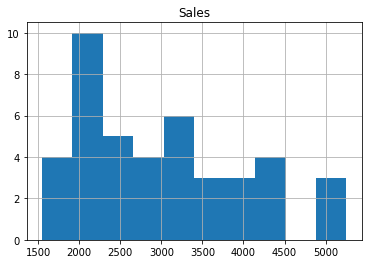

In [17]:
df.hist()
plt.show()

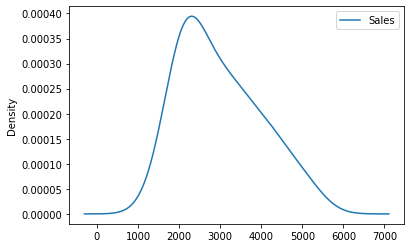

In [18]:
df.plot(kind="kde")
plt.show()

In [19]:
np.array(df["Sales"])

array([1734.82699966, 2244.96099854, 2533.80499268, 2154.96299744,
       1547.81899643, 2104.41199493, 2014.36299896, 1991.74699783,
       1869.04999924, 2313.63199615, 2128.31999969, 2026.82899857,
       1910.60399628, 2331.16499329, 2206.54999542, 2173.96799469,
       2148.27799988, 2739.30799866, 2792.7539978 , 2556.00999451,
       2480.97399902, 3039.522995  , 3172.11599731, 2879.00099945,
       2772.        , 3550.        , 3508.        , 3243.85999298,
       3056.        , 3899.        , 3629.        , 3373.        ,
       3352.        , 4342.        , 4461.        , 4017.        ,
       3854.        , 4936.        , 4895.        , 4333.        ,
       4194.        , 5253.        ])

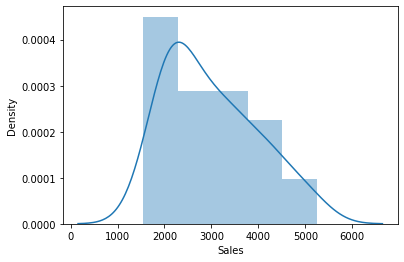

In [20]:
sns.distplot(df['Sales'],kde=True)
plt.show()

In [21]:
from pandas.plotting import lag_plot

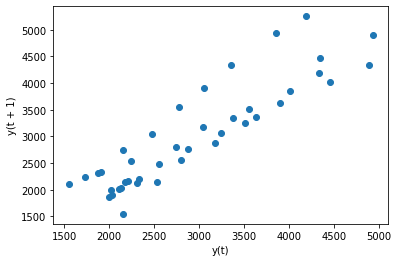

In [22]:
lag_plot(df['Sales'])
plt.show()

In [23]:
df["Sales"].values.min()

1547.8189964294434

In [24]:
df["Sales"].values.max()

5253.0

# Preprocessing

In [25]:
len(df)

42

In [26]:
df['quarter'] = 0
for i in range(42):
    p=df['Quarter'][i]
    df['quarter'][i]=p[0:2]

In [27]:
df

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [28]:
df['quarter'].value_counts()

Q1    11
Q2    11
Q3    10
Q4    10
Name: quarter, dtype: int64

In [29]:
df_dummies=pd.DataFrame(pd.get_dummies(df['quarter']),columns=['Q1','Q2','Q3','Q4'])
cc=pd.concat([df,df_dummies],axis= 1)


In [30]:
df.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [31]:
df.tail()

,Quarter,Sales,quarter
37,Q2_95,4936.0,Q2
38,Q3_95,4895.0,Q3
39,Q4_95,4333.0,Q4
40,Q1_96,4194.0,Q1
41,Q2_96,5253.0,Q2


In [32]:
cc

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [33]:

cc['t'] = np.arange(1,43)
cc['t_squared'] = cc['t']**2
cc["Sales_log"] =np.log(df['Sales'])

In [34]:

cc

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


spiliting data

In [35]:
train =cc.head(32)
test =cc.tail(10)


<AxesSubplot: >

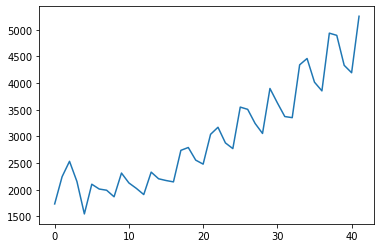

In [36]:

df['Sales'].plot()

Models

In [37]:
from sklearn.metrics import mean_squared_error

Linear Model

In [38]:
import statsmodels.formula.api as smf

In [39]:

linear_model =smf.ols("Sales~t",data =train).fit()


In [40]:
linear_pred = pd.Series(linear_model.predict(test['t']))
linear_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(linear_pred)))
linear_rmse

752.9233932767115

In [41]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     89.71
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           1.59e-10
Time:                        17:41:04   Log-Likelihood:                -228.29
No. Observations:                  32   AIC:                             460.6
Df Residuals:                      30   BIC:                             463.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1628.7787    113.439     14.358      0.000    1397.104    1860.453
t             56.8275      6.000      9.472      0.000      44.575      69.080
==============================================================================
Omnibus:                        1.891   Durbin-Watson:                   1.343
Prob(Omnibus):                  0.389   Jarque-Bera (JB):                1.731
Skew:                           0.519   Prob(JB):                        0.421
Kurtosis:                       2.531   Cond. No.                         38.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Quadratic Model

In [42]:

quad_model =smf.ols("Sales~t+t_squared",data=train).fit()


In [43]:
quad_pred = pd.Series(quad_model.predict(test[['t','t_squared']]))
quad_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(quad_pred)))
quad_rmse

457.73573554072897

In [44]:
quad_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     65.96
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           1.62e-11
Time:                        17:41:04   Log-Likelihood:                -223.01
No. Observations:                  32   AIC:                             452.0
Df Residuals:                      29   BIC:                             456.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2023.7004    152.790     13.245      0.000    1711.211    2336.190
t            -12.8646     21.346     -0.603      0.551     -56.521      30.792
t_squared      2.1119      0.628      3.365      0.002       0.828       3.395
==============================================================================
Omnibus:                        2.222   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.329   Jarque-Bera (JB):                1.302
Skew:                           0.164   Prob(JB):                        0.521
Kurtosis:                       2.068   Cond. No.                     1.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Exponential model



In [45]:
exp_model  =smf.ols("Sales_log~t",data=train).fit()


In [46]:
exp_pred =pd.Series(exp_model.predict(test['t']))
exp_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(exp_pred)))
exp_rmse

4387.940544839098

In [47]:
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Sales_log   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     87.79
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           2.04e-10
Time:                        17:41:04   Log-Likelihood:                 23.071
No. Observations:                  32   AIC:                            -42.14
Df Residuals:                      30   BIC:                            -39.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4632      0.044    169.648      0.000       7.373       7.553
t              0.0218      0.002      9.370      0.000       0.017       0.027
==============================================================================
Omnibus:                        1.165   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.558   Jarque-Bera (JB):                0.732
Skew:                           0.370   Prob(JB):                        0.693
Kurtosis:                       2.971   Cond. No.                         38.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])


,MODEL,RMSE_Values
2,rmse_quad,457.735736
0,rmse_linear,752.923393
1,rmse_exp,4387.940545


Arima Model

In [49]:
arima = pd.read_excel('CocaCola_Sales_Rawdata.xlsx',index_col=0)


In [50]:
arima

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


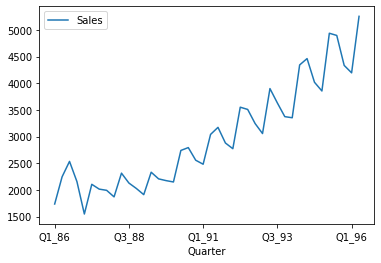

In [51]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
arima.plot()
pyplot.show()

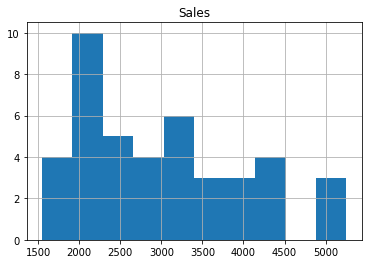

In [52]:
arima.hist()
plt.show()

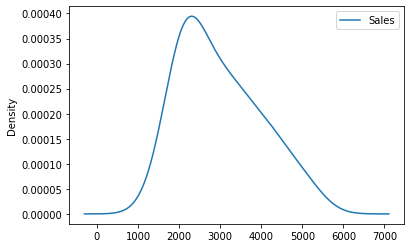

In [53]:
arima.plot(kind='kde')
plt.show()

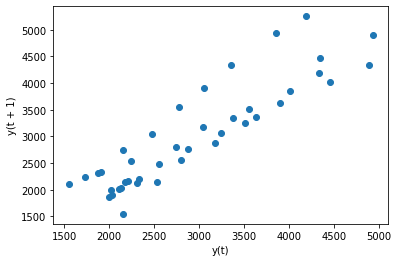

In [54]:
lag_plot(arima)
plt.show()

In [55]:
from statsmodels.graphics.tsaplots import plot_acf

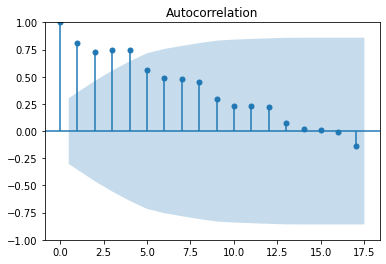

In [56]:
plot_acf(arima) #autocorrelation plot
plt.show()

In [57]:
arima["Sales"].values.min()

1547.8189964294434

In [58]:
arima["Sales"].values.min()

1547.8189964294434

In [59]:
# separate out a validation dataset
split_point = len(arima) - 7
dataset, validation = arima[0:split_point], arima[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 35, Validation 7


Persistence/ Base model

In [60]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [61]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2148.278, Expected=2739.308
>Predicted=2739.308, Expected=2792.754
>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000
>Predicted=3373.000, Expected=3352.000
>Predicted=3352.000, Expected=4342.000
>Predicted=4342.000, Expected=4461.000
RMSE: 434.401


In [62]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","RMSE_ARIMA"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,rmse])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])


,MODEL,RMSE_Values
3,RMSE_ARIMA,434.400665
2,rmse_quad,457.735736
0,rmse_linear,752.923393
1,rmse_exp,4387.940545


# RMSE_ARIMA will be preffered